In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
netflix = Path("Resources/netflix_data.csv")
hulu = Path("Resources/hulu_data.csv")
amazon = Path("Resources/amazon_data.csv")
disney=Path("Resources/disney_data.csv")

netflix_df =pd.read_csv(netflix)
hulu_df =pd.read_csv(hulu)
amazon_df =pd.read_csv(amazon)
disney_df =pd.read_csv(disney)

In [3]:
netflix_df['streaming_service'] = 'Netflix'
hulu_df['streaming_service'] = 'Hulu'
amazon_df['streaming_service'] = 'Amazon'
disney_df['streaming_service'] = 'Disney'


In [4]:
combined_df = pd.concat([netflix_df, hulu_df, amazon_df, disney_df], axis=0)

In [5]:
combined_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,streaming_service,cast,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,Netflix,NaN,NaN
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Netflix,NaN,NaN
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",Netflix,NaN,NaN
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Netflix,NaN,NaN
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Netflix,NaN,NaN


In [6]:
tv_shows_df = combined_df[(combined_df["type"] == "TV Show")]

tv_shows_df['Season Number'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(int)

tv_shows_df.head()

/var/folders/16/hndb9ls55qvcxfq6btwxrkbc0000gn/T/ipykernel_73433/3458973940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['Season Number'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(int)


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,streaming_service,cast,description,Season Number
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Netflix,NaN,NaN,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",Netflix,NaN,NaN,1
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",Netflix,NaN,NaN,9
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV",Netflix,NaN,NaN,1
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Netflix,NaN,NaN,1


In [7]:
Netflix_tv_df = tv_shows_df[(tv_shows_df["streaming_service"] == "Netflix")]
Netflix_tv_duration = Netflix_tv_df["Season Number"].value_counts()
Netflix_tv_duration

Season Number
1     1791
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
15       2
13       2
12       2
17       1
11       1
Name: count, dtype: int64

In [8]:
Disney_tv_df = tv_shows_df[(tv_shows_df["streaming_service"] == "Disney")]
Disney_tv_duration = Disney_tv_df["Season Number"].value_counts()
Disney_tv_duration

Season Number
1     219
2      82
3      45
4      24
5      11
7       5
6       3
10      2
9       2
8       2
19      1
32      1
16      1
Name: count, dtype: int64

In [9]:
Hulu_tv_df = tv_shows_df[(tv_shows_df["streaming_service"] == "Hulu")]
Hulu_tv_duration = Hulu_tv_df["Season Number"].value_counts()
Hulu_tv_duration

Season Number
1     829
2     265
3     121
4      99
5      80
6      56
7      46
8      20
9      17
11     13
10     10
12      8
13      3
16      3
14      3
15      2
23      2
29      2
22      2
17      2
20      1
19      1
30      1
25      1
34      1
26      1
Name: count, dtype: int64

In [10]:
Amazon_tv_df = tv_shows_df[(tv_shows_df["streaming_service"] == "Amazon")]
Amazon_tv_duration = Amazon_tv_df["Season Number"].value_counts()
Amazon_tv_duration

Season Number
1     1342
2      229
3      110
4       62
5       39
6       23
7       15
8       10
9        6
10       5
14       3
11       3
12       3
29       1
21       1
19       1
15       1
Name: count, dtype: int64

In [11]:
TV_duration_df = pd.DataFrame({
    "Netflix TV Duration": Netflix_tv_duration,
    "Hulu TV Duration": Hulu_tv_duration,
    "Amazon TV Duration": Amazon_tv_duration,
    "Disney TV Duration": Disney_tv_duration
})

TV_duration_df_sorted = TV_duration_df.sort_values(by="Season Number", ascending=True)
TV_duration_df_sorted

,Netflix TV Duration,Hulu TV Duration,Amazon TV Duration,Disney TV Duration
Season Number,,,,
1,1791.0,829.0,1342.0,219.0
2,421.0,265.0,229.0,82.0
3,198.0,121.0,110.0,45.0
4,94.0,99.0,62.0,24.0
5,64.0,80.0,39.0,11.0
6,33.0,56.0,23.0,3.0
7,23.0,46.0,15.0,5.0
8,17.0,20.0,10.0,2.0
9,9.0,17.0,6.0,2.0


<Axes: xlabel='Season Number'>

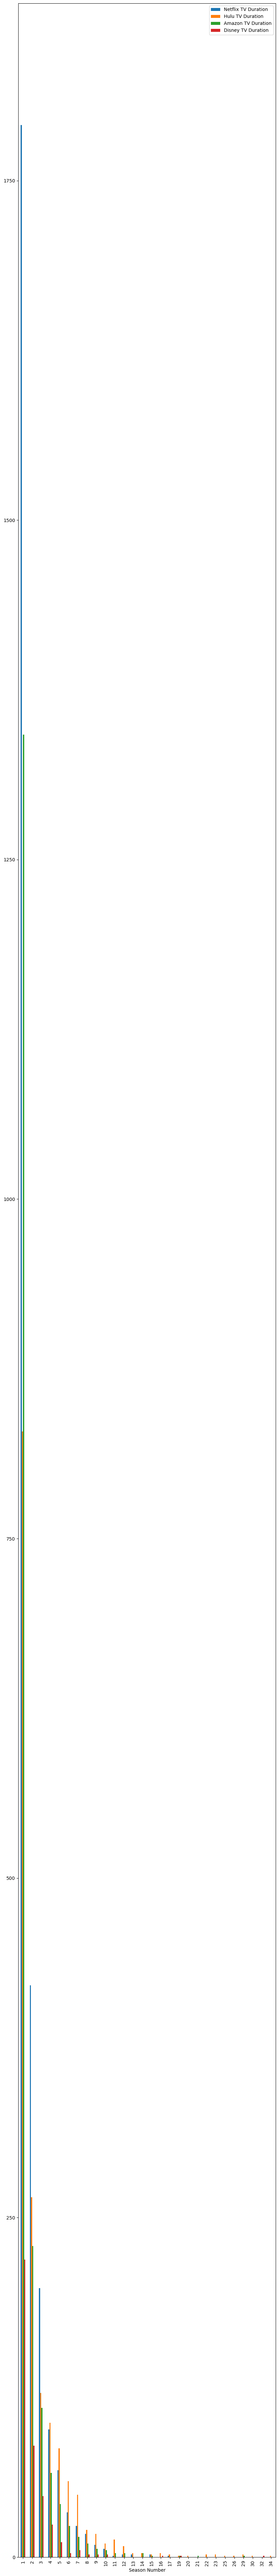

In [20]:
TV_duration_df_Bar = pd.DataFrame({
    "Netflix TV Duration": Netflix_tv_duration,
    "Hulu TV Duration": Hulu_tv_duration,
    "Amazon TV Duration": Amazon_tv_duration,
    "Disney TV Duration": Disney_tv_duration
})

TV_duration_df_Bar.plot(figsize=(10,100), kind="bar")